# Telco Customer Churn 
[dataset source](https://www.kaggle.com/blastchar/telco-customer-churn) <br>
[eda-repository](https://www.github.com/necrodancerr/eda-taskphase-shreesh) <br>
[my github](https://www.github.com/necrodancerr)<br>

## 1) About:
Churn rate is a measure of the number of indivisuals or items moving out of a group/organisation over a specific period. Hence it serves as an important metric for companies whose customers pay in a recurrent manner. It helps mostly subscription based companies to have a ballpark estimate of how many customers they will have sticking around over a period of time, visually the line of saturation in the graph developed gradually for a given time period. Note that this equilibrium may vary over years according to company strategies which are essentially ways to lure customers thus altering the churn rate to an ideal low. <br>

## 2) Dataset Overview 
Each row represents a customer, each column contains customer’s attributes described on the column metadata.

The data set includes information about:

1. Customers who left within the last month – the column is called Churn

2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

4. Demographic info about customers – gender, age range, and if they have partners and dependents


## 3) Objective: 
To derive better meaning out of the given data by mere observation and visualisation aided comparision

In [59]:
#who cares about warnings anyway
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import jovian

#importing dataset
dataset = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", index_col='customerID')
dataset['PaymentMethod'] = dataset['PaymentMethod'].replace('Bank transfer (automatic)', 'Bank transfer')
dataset['PaymentMethod'] =dataset['PaymentMethod'].replace('Credit card (automatic)', 'Credit card')

#splitting dataset / churn
bye = dataset[dataset['Churn'] == 'Yes']
nobye = dataset[dataset['Churn'] == 'No']

#fixing missing values
dataset['TotalCharges'] = dataset['TotalCharges'].replace(" ", 0)
temp = dataset['TotalCharges'].values.reshape(-1,1).astype('float64')
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=0., strategy='mean', axis = 0)
imputer.fit(temp[:, :])
imputer.transform(temp[:, :])
dataset['TotalCharges'] = temp

#splitting in homogeneous categories
cat_feat = list(dataset.columns)
cat_feat.remove('tenure')
cat_feat.remove('MonthlyCharges')
cat_feat.remove('TotalCharges')
cat_feat.remove('Churn')

num_feat = ['tenure', 'MonthlyCharges', 'TotalCharges']
pred = 'Churn'

In [55]:
#helper functions
#################
def plot_this(i,o):
    plt.figure(figsize=(o,10))
    sns.set_style("darkgrid")
    plt.title("{} distribution".format(i.capitalize()), fontsize = 18)
    plot = sns.countplot(x = '{}'.format(i), data=dataset, hue = dataset['Churn'], palette='Set2')
    plt.ylabel("Number of people", fontsize = 14)
    plt.xlabel('{}'. format(i),fontsize = 14)
    for p in plot.patches:
        plot.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+4))
    plt.show()
#################
def calculate_this(col):
    print("\n{}".format(col.capitalize()))
    total = len(dataset[col])
    for cat in dataset[col].unique():
        if (col == 'SeniorCitizen'):
            q = len(dataset[dataset[col]==cat])
            if cat == 0:
                print("%Not senior:\nCD: {}% \nRR: {}%".format(round(q/total*100,2),round((1-len(bye[bye[col]==cat])/len(dataset[dataset[col]==cat]))*100,2)))
            else:
                print("%Senior:\nCD: {}% \nRR: {}%".format(round(q/total*100,2),round((1-len(bye[bye[col]==cat])/len(dataset[dataset[col]==cat]))*100,2)))
        else:
            q = len(dataset[dataset[col]=='{}'.format(cat)])
            print("%{}:\nCD: {}% \nRR: {}%".format(cat, round(q/total*100,2),round((1-len(bye[bye[col]=='{}'.format(cat)])/len(dataset[dataset[col]=='{}'.format(cat)]))*100,2)))
    print("--------------------")

## 4) Exploratory Analysis
### 4.1) Churn Distribution

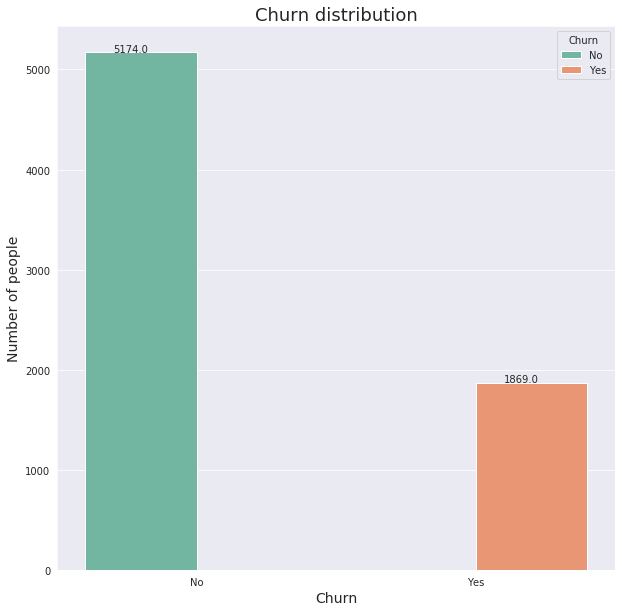

In [56]:
plot_this('Churn',10)

### a) Numerical Analysis

In [57]:
total = dataset.shape[0]
left = len(dataset[dataset['Churn']=='Yes'])
stayed = len(dataset[dataset['Churn'] == 'No'])
print("Total: {}\n%Left: {}%\n%Stayed: {}%".format(total, left/total*100, stayed/total*100))

Total: 7043
%Left: 26.536987079369588%
%Stayed: 73.4630129206304%


### b) Inference
Referring to [Buisness Daily](https://business.dailypay.com/blog/employee-retention-rate) a customer retention rate of 73% is fairly low, perhaps excavating further would help us get to the thicker roots of customer dissatisfaction

## 4.2) Categorical breakdown

### a) Numerical Analysis
Retention rate (RR) is the rate with respect to each class, subset to the category of customers who churned in the last month<br>
Class distribution (CD) is the %distribution of each class over the entire dataset

In [58]:
calculate_this('gender')


Gender
%Female:
CD: 49.52% 
RR: 73.08%
%Male:
CD: 50.48% 
RR: 73.84%
--------------------


### Inferences from categorical data
- Female customers are more likely to leave vs Male customers, but the difference is almost negligible ~0.04%, thus ruling out gender as a basis of judgement
- Senior citizens churned a lot more than the younger age groups, yeilding a retention rate of only 58.32% while younger age groups demonstrate a retention rate ~76.39%
- Coincidentally dependent groups and couples seemed to have a bad experience with the company hence contributing identically to the churn
- About 90% users opted for the phone services of which almost 3/4th continued their subscription indicating customer satisfaction in that domain
- Almost equal number of customer opted for multiple line services. The stats recorded an identical retention rate for both halves thus indicating satisfactory multiple line services offered by the company
- Contrary to expectations, fiber optic services, despite being the faster of the two internet services churned at an alarming rate
- People who did not purchase services like online security, online backup and device protection churned more than the ones who did. 

In [50]:
onsec = dataset[dataset['OnlineSecurity']=='Yes']
onbac = dataset[dataset['OnlineBackup']=='Yes']
dp = dataset[dataset['DeviceProtection']=='Yes']
tech = dataset[dataset['TechSupport']=='Yes']
no_tech = dataset[dataset['TechSupport']=='No']
services_w_support=pd.concat([onbac,onsec, dp], ignore_index=True).drop_duplicates()
services_w_support=pd.merge(services_w_support, tech, how='inner')
services_wo_support = pd.concat([onbac, onsec, dp])
services_wo_support = pd.merge(services_wo_support, no_tech, how='inner')
churn_w = len(services_w_support[services_w_support['Churn']=='Yes'])
churn_wo = len(services_wo_support[services_wo_support['Churn']=='Yes'])
print("Churn rate")
print("% People w service but wo support: {}%".format(churn_wo/(churn_wo+churn_w)*100))
print("% People w service but w support: {}%".format(churn_w/(churn_wo+churn_w)*100))

Churn rate
% People w service but wo support: 80.83197389885808%
% People w service but w support: 19.168026101141926%


- Evidently customers who opted for afore mentioned services but didn't go for helping services like tech support dominated the attrition rate
- The streaming services such as TV and Movie didn't affect the churn significantly, by numbers the number of people who bought those services and churned were almost equal to the number who didn't

In [54]:
telecom_churn_services = dataset[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies'
                                       ,'TechSupport', 'StreamingTV', 'OnlineBackup', 'Churn']]
telecom_churn_services.replace(to_replace='Yes', value=1, inplace=True)
telecom_churn_services.replace(to_replace='No', value=0, inplace=True)
telecom_churn_services = telecom_churn_services[telecom_churn_services.OnlineSecurity !='No internet service']             
all_services = telecom_churn_services.groupby('Churn', as_index=False)[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']].sum()

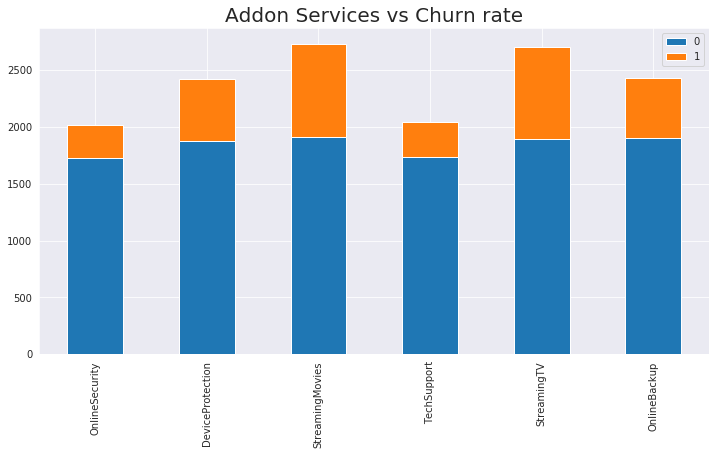

In [58]:
ax = all_services.set_index('Churn').T.plot(kind='bar', stacked=True, figsize=(12,6))
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')
ax.set_title('Addon Services vs Churn rate', fontsize=20)
plt.show()

- Although the comparision of streaming category and churn class alone doesn't throw much information. But by comparing all the services offered we can tell how Streaming services offered were <i>relatively</i> the poorest of all

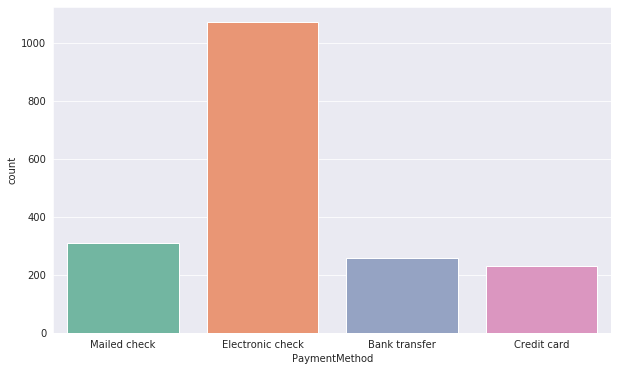

In [70]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'PaymentMethod', data=bye, palette='Set2')
plt.show()

- Wouldn't take a genius to figure out how bad their interface for electronic check payement has been. A devastatingly low retention rate of 54.71%

## 3. Numeric Feature Breakdown

In [63]:
dataset[num_feat].describe()
# jovian.commit()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


***Note for reader:*** The inferences and graphs for numerical data have been removed for the time being. I ended up confusing myself too much while I was at it